### CLIP OPENAI

https://huggingface.co/openai/clip-vit-base-patch32

In [2]:
import os
import sys
import uuid

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

from config.path import get_training_data_path


from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt

In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

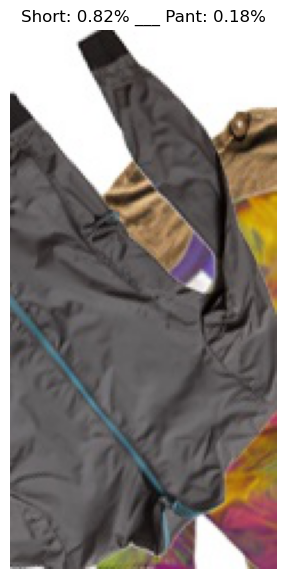

In [15]:
def predictor(text_prompt):
    inputs = processor(text=text_prompt, images=image, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    return logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

file_name = 'tshirt_7171.jpg'

#img_path = get_training_data_path(file_name)

image = Image.open('./cropped_image_5.jpg').convert("RGB")

probs = predictor(['a photo a upper body cloth', 'a photo of a lower body cloth'])

if probs[0][0] < probs[0][1]:
    probs = predictor(['a photo of a short pants', 'a photo of a long pants'])
    res = f"Short: {probs[0][0]:.2f}% ___ Pant: {probs[0][1]:.2f}%"

else: 
    print("Detected: Upper Body Cloth Type")
    probs = predictor(['a photo of a short sleeve top', 'a photo of a long-sleeve top'])
    res = f"Short Sleeve: {probs[0][0]:.2f}% ___ Long Sleeve: {probs[0][1]:.2f}%"

    if probs[0][0] > probs[0][1]:
        probs = predictor(['a photo of a t-shirt', 'a photo of a polo shirt'])
        res = f"T-Shirt: {probs[0][0]:.2f}% ___ Polo Shirt: {probs[0][1]:.2f}%"

    else:
        probs = predictor(['a photo of a sweatshirt', 'a photo of a jacket'])
        res = f"Shirt: {probs[0][0]:.2f}% ___ Jacket: {probs[0][1]:.2f}%"


unique_id = str(uuid.uuid4())[:4]  # Extracting the first 4 characters of a UUID
#name = img_path.split("/")[-1]
#format_string = name.split(".")[0] + "_" + unique_id
# Display the image and the colored segmentation map
plt.figure(figsize=(7, 7))
plt.imshow(image)
plt.axis('off')
plt.title(res)
#plt.savefig("clip_out/" + format_string)
plt.imshow(image)
plt.show()